# EDA Fraude


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


***Nota:*** *En caso de visualizar el mensaje 'ModuleNotFoundError', ignorarlo.*

## Datos: Fraude

Los datos proceden de transacciones reales de comercio electrónico de Vesta y contienen una amplia gama de características, desde el tipo de dispositivo hasta las características del producto. El objetivo principal es mejorar la eficacia de las alertas de transacciones fraudulentas para millones de personas en todo el mundo, ayudando a cientos de miles de empresas a reducir sus pérdidas por fraude y aumentar sus ingresos. Y, por
supuesto, ahorrará a muchas personas la molestia de los falsos positivos.


In [2]:
# lectura de datos
fraudet_df = pd.read_csv('C:/Users/kaes1/Downloads/train_transaction.csv')
fraudet_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [3]:
fraudei_df = pd.read_csv('C:/Users/kaes1/Downloads/train_identity.csv')
fraudei_df.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


Los datos train_transaction y los datos train_identity contienen información de las transaciones de los clientes de Vesta, por lo que es necesario tener toda esta información en el análisis. Por esta razón se realiza el merge de los datos a continuación:

In [4]:
# merge de datos
fraude_df=pd.merge(fraudet_df, fraudei_df, on='TransactionID', how='left')
fraude_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0

Se puede tener un primer vistazo a los datos, y se nota que muchas de las varaibles tienen datos faltantes, por lo que será necesario cuantificar la cantidad de datos faltantes en los datos. Tambien se puede observar que algunas variables, como las V***, tienen valores similares, lo que podria llevar a excluir algunas de estas variables a futuro al realizar el análisis de correlación y multicolinealidad.

In [5]:
fraude_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


In [6]:
fraude_df.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=434)

In [7]:
fraude_df.shape

(590540, 434)

La cantidad de variables en el dataset es tan grande que no permite visualizar cierta información sobre estas. En total se tienen 434 campos, entre los que se tiene la variable explicativa **isFraud**

Se retira del análisis la variable **TransactionID**, ya que solo es un identificador de los registros y no aporta información sobre la transacción.

In [8]:
# Eliminar del dataframe 'TransactionID'
fraude_df =fraude_df.drop('TransactionID', axis=1)

In [9]:
# Tipos de variables
cat_cols=fraude_df.select_dtypes(include=['object']).columns
num_cols = fraude_df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
       'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33',
       'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo'],
      dtype='object')
Numerical Variables:
['isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46',

La gran mayoria de variables explicativas parecen ser de tipo númerica. 

### Descripción númerica de los datos

In [10]:
fraude_df.describe()

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,238269.000000,37627.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,589271.000000,309743.000000,327662.000000,421618.000000,280699.000000,73187.000000,38917.000000,74926.000000,74926.000000,514518.000000,311253.000000,64717.000000,61952.000000,62187.000000,501427.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,421571.000000,421571.000000,421571.000000,421571.00000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,590226.000000,590226.00000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000

Se pueden observar la mediana, desviacion y cuartiles para cada una de las variables númericas del dataset. Algunas variables, como las V***, tienen valores que se acumulan alrededor del valor 0 o 1(mas del 75% de los datos), y con una alta desviación. Estas variables se revisar a mayor detalle para entender a que se debe ese comportamiento. Otras variables parecen tener valores atipicos, por ejemplo TransactionAmt, debido a que el valor máximo es considerablemente mayor a la media y mediana, pero esto se confirmará mas adelante.

In [11]:
fraude_df.describe(include='object')

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_12,id_15,id_16,id_23,id_27,id_28,id_29,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
count,590540,588963,588969,496084,137291,319440,319440,319440,309096,240058,421180,244275,244288,244288,144233,140985,129340,5169,5169,140978,140978,77565,140282,73289,77805,140985,140985,140985,140985,140810,118666
unique,5,4,4,59,60,2,2,2,3,2,2,2,2,2,2,3,2,3,2,2,2,75,130,260,4,2,2,2,2,2,1786
top,W,visa,debit,gmail.com,gmail.com,T,T,T,M0,F,F,F,F,T,NotFound,Found,Found,IP_PROXY:TRANSPARENT,Found,Found,Found,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
freq,439670,384767,439938,228355,57147,319415,285468,251731,196405,132491,227856,211374,155251,205656,123025,67728,66324,3489,5155,76232,74926,21155,22000,16874,60011,77814,134066,110452,73922,85165,47722


Para las variables categoricas se pueden observar la cantidad de categorias, la categoria mas frecuente y la frecuencia con la que se presenta. 

### Conteo y procentaje de datos faltantes

Anteriormente se visualizó de manera rapida, que algunas varibales contienen datos faltantes. Ahora se va a cuantificar la cantidad de datos faltantes para cada campo.

In [12]:
# Conteo de datos faltantes
pd.DataFrame(fraude_df.isnull().sum()).T

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,0,0,0,0,0,8933,1565,1577,4259,1571,65706,65706,352271,552913,94456,453249,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1269,280797,262878,168922,309841,517353,551623,515614,515614,76022,279287,525823,528588,528353,89113,271100,271100,271100,281444,350482,169360,346265,346252,346252,279287,279287,279287,279287,279287,279287,279287,279287,279287,279287,279287,76073,76073,76073,76073,76073,76073,76073,76073,76073,76073,76073,76073,76073,76073,76073,76073,76073,76073,76073,76073,76073,76073,76073,168969,168969,168969,168969,168969,168969,168969,168969,168969,168969,168969,168969,168969,168969,168969,168969,168969,168969,77096,77096,77096,77096,77096,77096,77096,77096,77096,77096,77096,77096,77096,77096,77096,77096,77096,77096,77096,77096,77096,77096,89164,89164,89164,89164,89164,89164,89164,89164,89164,89164,89164,89164,89164,89164,89164,89164,89164,89164,89164,89164,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,508595,508595,508595,508595,508595,508589,508589,508589,508595,508595,508595,508595,508589,508589,508589,508595,508595,508595,508595,508595,508595,508589,508589,508595,508595,508595,508589,508589,508589,450909,450909,450721,450721,450721,450909,450909,450721,450721,450909,450909,450909,450909,450721,450909,450909,450909,450721,450721,450909,450909,450721,450721,450909,450909,450909,450909,450721,450721,450909,450721,450721,450909,450721,450721,450909,450909,450909,450909,450909,450909,450721,450721,450721,450909,450909,450909,450909,450909,450909,460110,460110,460110,449124,449124,449124,460110,460110,460110,460110,449124,460110,460110,460110,460110,460110,460110,449124,460110,460110,460110,449124,449124,460110,460110,460110,460110,460110,449124,460110,460110,460110,460110,449124,449124,460110,460110,460110,449124,449124,460110,460110,449124,460110,460110,4

In [13]:
# Porcentaje de datos faltantes
porcentaje_nulos = (fraude_df.isnull().sum()/(len(fraude_df)))*100
pd.DataFrame(porcentaje_nulos).T

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,0.0,0.0,0.0,0.0,0.0,1.512683,0.265012,0.267044,0.721204,0.266028,11.126427,11.126427,59.652352,93.628374,15.994852,76.751617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.214888,47.549192,44.514851,28.604667,52.467403,87.606767,93.40993,87.31229,87.31229,12.873302,47.293494,89.041047,89.509263,89.469469,15.090087,45.907136,45.907136,45.907136,47.658753,59.349409,28.678836,58.635317,58.633115,58.633115,47.293494,47.293494,47.293494,47.293494,47.293494,47.293494,47.293494,47.293494,47.293494,47.293494,47.293494,12.881939,12.881939,12.881939,12.881939,12.881939,12.881939,12.881939,12.881939,12.881939,12.881939,12.881939,12.881939,12.881939,12.881939,12.881939,12.881939,12.881939,12.881939,12.881939,12.881939,12.881939,12.881939,12.881939,28.612626,28.612626,28.612626,28.612626,28.612626,28.612626,28.612626,28.612626,28.612626,28.612626,28.612626,28.612626,28.612626,28.612626,28.612626,28.612626,28.612626,28.612626,13.05517,13.05517,13.05517,13.05517,13.05517,13.05517,13.05517,13.05517,13.05517,13.05517,13.05517,13.05517,13.05517,13.05517,13.05517,13.05517,13.05517,13.05517,13.05517,13.05517,13.05517,13.05517,15.098723,15.098723,15.098723,15.098723,15.098723,15.098723,15.098723,15.098723,15.098723,15.098723,15.098723,15.098723,15.098723,15.098723,15.098723,15.098723,15.098723,15.098723,15.098723,15.098723,0.053172,0.053172,0.053172,0.053172,0.053172,0.053172,0.053172,0.053172,0.053172,0.053172,0.053172,0.053172,0.053172,0.053172,0.053172,0.053172,0.053172,0.053172,0.053172,0.053172,0.053172,0.053172,0.053172,0.053172,0.053172,0.053172,0.053172,0.053172,0.053172,0.053172,0.053172,0.053172,0.053172,0.053172,0.053172,0.053172,0.053172,0.053172,0.053172,0.053172,0.053172,0.053172,0.053172,86.123717,86.123717,86.123717,86.123717,86.123717,86.122701,86.122701,86.122701,86.123717,86.123717,86.123717,86.123717,86.122701,86.122701,86.122701,86.123717,86.123717,86.12371

Se logra observar, que existe una gran cantidad de variables con un porcentaje de datos faltantes superior al 50% de los datos. A continuación se decide trbajar solo con aquellas variables que tengan un porcentaje de datos faltantes menor al 20%.

In [14]:
# Cantidad de columnas con datos perdidos
columnas_con_nulos = porcentaje_nulos[porcentaje_nulos >= 20]
columnas_nulas= columnas_con_nulos.index.tolist()
len(columnas_nulas)

252

Se puede ver que mas de 250 columnas con un porcentaje de datos nulos mayor o igual al 20%. Estas columnas no podrian ser usadas para tareas de análisis avanzado o predictivas, ya que no brindan suficiente información.

Ahora se dejan en el dataset solo las columnas que tienen un porcentaje de datos faltantes menor al 20%:

In [15]:
# cantidad de columnas restantes
columnas_con_nulos = porcentaje_nulos[porcentaje_nulos < 20]
columnas_restantes= columnas_con_nulos.index.tolist()
len(columnas_restantes)

181

In [16]:
# Eliminar columnas con nulos
fraude_df=fraude_df.drop(columnas_nulas, axis=1)
fraude_df.shape

(590540, 181)

Quedan 181 variables y 590540 registros en nuestro set de datos para identificar el fraude de una transacción.

### Análisis Univariado y Bivariado

Se realiza en análisis univariado para la variable dependiente, isFraud, y algunas variables explicativas

* **Variable dependiente**

In [17]:
labels = (fraude_df['isFraud'].value_counts())
labels

isFraud
0    569877
1     20663
Name: count, dtype: int64

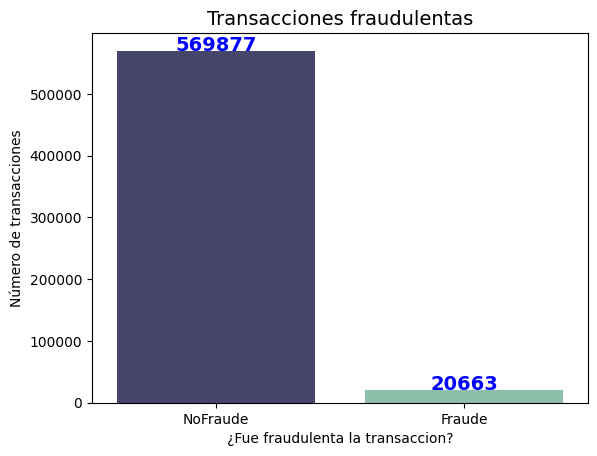

In [18]:
ax = sns.countplot(x = 'isFraud', data = fraude_df, palette=["#3f3e6fd1", "#85c6a9"])
plt.xticks(np.arange(2), ['NoFraude', 'Fraude'])
plt.title('Transacciones fraudulentas',fontsize= 14)
plt.xlabel('¿Fue fraudulenta la transaccion?')
plt.ylabel('Número de transacciones');

for i, v in enumerate(labels):
    ax.text(i, v-40, str(v), horizontalalignment = 'center', size = 14, color = 'b', fontweight = 'bold');

In [19]:
fraude_df['isFraud'].value_counts(normalize = True)

isFraud
0    0.96501
1    0.03499
Name: proportion, dtype: float64

Se puede observar que la cantidad de transacciones fraudulentas en relativamente baja (solo un 3.5 %) en comparación a la cantidad de transacciones sin fraude (96.5%), por lo que se tiene un dataset desbalanceado, lo que podria afectar el desempeño de los modelos de clasificación que se pudiesen plantear, para lo cual se tendrían que aplicar técnicas de balanceo para los datos.

* **TransactionAmt**

Column:  TransactionAmt
Skew: 14.37
Kurtosis:  1123.96


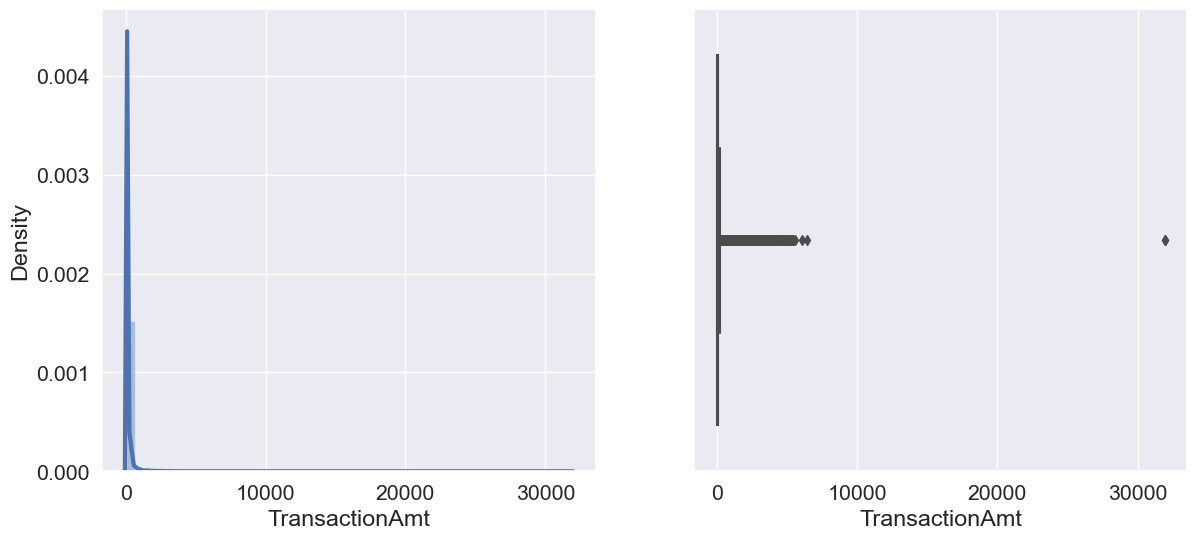

In [20]:
# Variable dependiente
sns.set(font_scale=1.4)
col = 'TransactionAmt'
print('Column: ', col)
print('Skew:', round(fraude_df[col].skew(), 2))
print('Kurtosis: ', round(fraude_df[col].kurtosis(), 2))
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
sns.distplot(fraude_df[(fraude_df['TransactionAmt'] > 0)].TransactionAmt, kde_kws={"lw": 3}, bins = 50)
plt.subplot(1, 2, 2)
sns.boxplot(x=fraude_df[col])
plt.show()

Se logra observar que distribución para importe de pago de la transacción esta sesgada a la izquierda (sesgo positivo) y que hay presencia de valores atípicos, problemente valores atípicos extremos. Se observa a continuación como de distribuyen los valores del importe para cada tipo de transacción:

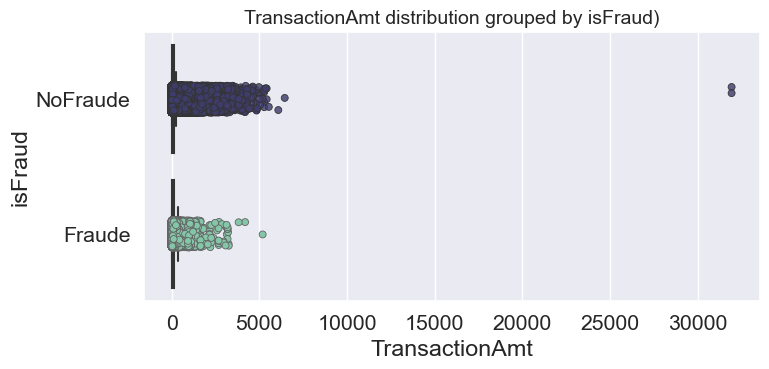

In [21]:
plt.figure(figsize=(8, 4))
sns.boxplot(y = 'isFraud', x = 'TransactionAmt', data = fraude_df, palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0, orient = 'h')
sns.stripplot(y = 'isFraud', x = 'TransactionAmt', data = fraude_df, linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')
plt.yticks( np.arange(2), ['NoFraude', 'Fraude'])
plt.title('TransactionAmt distribution grouped by isFraud)',fontsize= 14)
plt.ylabel('isFraud')
plt.tight_layout()

In [22]:
pd.DataFrame(fraude_df.groupby('isFraud')['TransactionAmt'].describe())

,count,mean,std,min,25%,50%,75%,max
isFraud,,,,,,,,
0,569877.0,134.511665,239.395078,0.251,43.970,68.5,120.0,31937.391
1,20663.0,149.244779,232.212163,0.292,35.044,75.0,161.0,5191.000


Se logra observar en los graficos de cajas, que si existen valores atípicos extremos, los cuales pertenecen a la clase de transacciones legitimas. Se van a tratar estos datos atípicos, reemplazandolo por el valor de la mediana para el importe de pago.

In [23]:
# reemplazar valores atipicos extremos con mediana de la variable
fraude_df.loc[fraude_df['TransactionAmt'] > 30000, 'TransactionAmt'] = fraude_df['TransactionAmt'].median()


In [24]:
pd.DataFrame(fraude_df.groupby('isFraud')['TransactionAmt'].describe())

,count,mean,std,min,25%,50%,75%,max
isFraud,,,,,,,,
0,569877.0,134.399821,231.862849,0.251,43.970,68.5,120.0,6450.97
1,20663.0,149.244779,232.212163,0.292,35.044,75.0,161.0,5191.00


La mediana del importe de pago para las transacciones fraudulentas es es mayor a la mediana del importe para las transacciones legitimas, lo que podria indicar que valores altos de importe tienen una probabilidad mayor de ser de transacciones fraudulentas.

* **D1**

La siguiente variable a analziar es una de las variables de intervalo de tiempo.

Column:  D1
Skew: 1.81
Kurtosis:  2.2


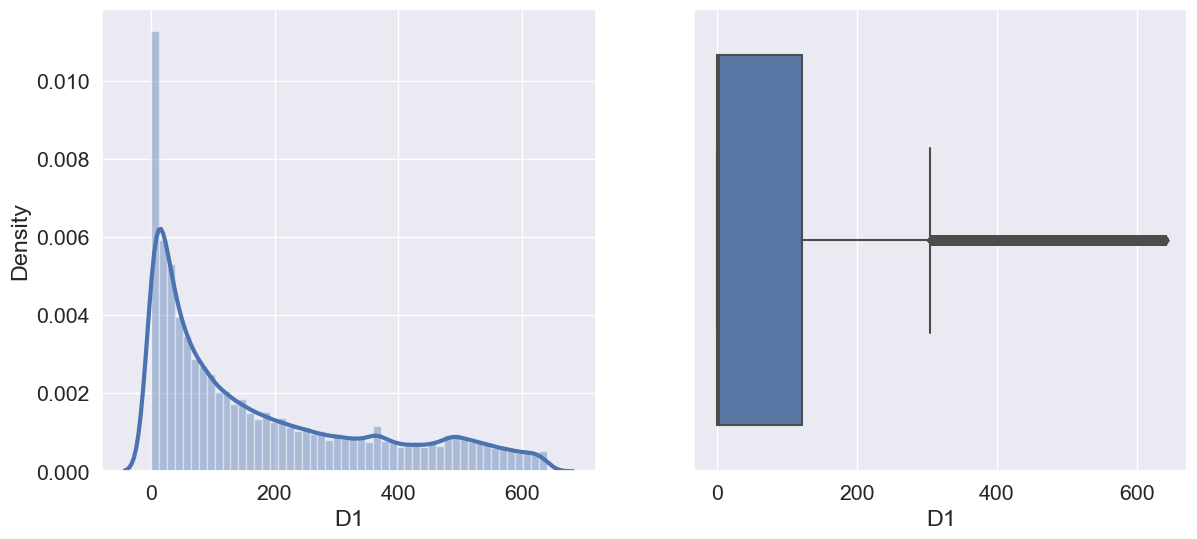

In [44]:
# Variable dependiente
sns.set(font_scale=1.4)
col = 'D1'
print('Column: ', col)
print('Skew:', round(fraude_df[col].skew(), 2))
print('Kurtosis: ', round(fraude_df[col].kurtosis(), 2))
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
sns.distplot(fraude_df[(fraude_df['D1'] > 0)].D1, kde_kws={"lw": 3}, bins = 50)
plt.subplot(1, 2, 2)
sns.boxplot(x=fraude_df[col])
plt.show()

Esta variable tiene una distribución con sesgo positivo, y una presencia alta de atipicos como se puede ver por los graficos y el valor de Kurtosis. Ahora veamos como se comporta esta variable para cada tipo de transacción:

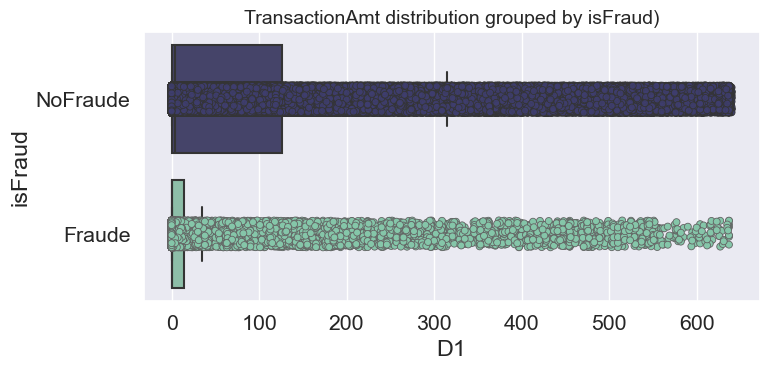

In [45]:
plt.figure(figsize=(8, 4))
sns.boxplot(y = 'isFraud', x = 'D1', data = fraude_df, palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0, orient = 'h')
sns.stripplot(y = 'isFraud', x = 'D1', data = fraude_df, linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')
plt.yticks( np.arange(2), ['NoFraude', 'Fraude'])
plt.title('TransactionAmt distribution grouped by isFraud)',fontsize= 14)
plt.ylabel('isFraud')
plt.tight_layout()

In [47]:
pd.DataFrame(fraude_df.groupby('isFraud')['D1'].describe())

,count,mean,std,min,25%,50%,75%,max
isFraud,,,,,,,,
0,568654.0,96.364705,158.973258,0.0,0.0,4.0,126.0,640.0
1,20617.0,38.711306,100.915599,0.0,0.0,0.0,14.0,637.0


Parecen tener la misma presencia de valores atipicos para los dos tipos de transacciones, pero el caso de las transacciones fraudulentas, se tiene una mayor concentración hacia el valor cero. Si se considera que esta variable representa el tiempo desde la ultima transación, esto puede ser un indicio de que las transacciones fraudulentas se presentan mas periodos tiempos mas corto desde la ultima transacción efectuada. 

* **ProductCD**

La siguiente variable a analizar es el tipo de producto de la transacción:

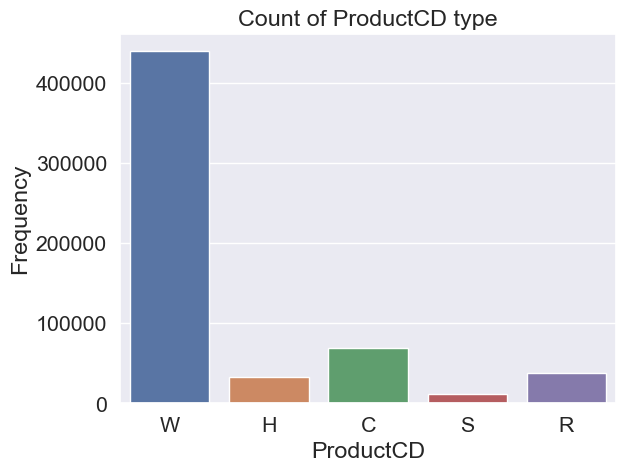

In [25]:
plt.title('Count of ProductCD type')
sns.countplot(x=fraude_df.ProductCD)
plt.xlabel('ProductCD')
plt.ylabel('Frequency')
plt.show()

Se puede observar que el tipo de producto mas frecuente es W, mientras los demas tipos producto tienen todos una frecuencia menos a 100000 en el conjunto de datos.

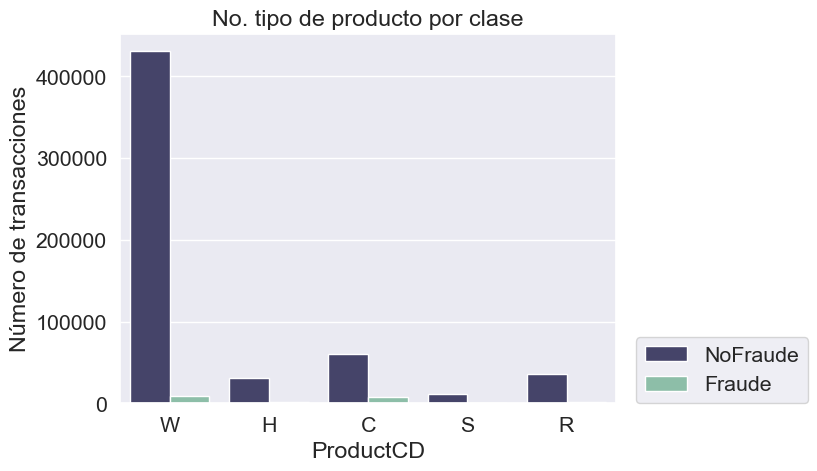

In [26]:
# ax2 = fig.add_subplot(132)
sns.countplot(x = 'ProductCD', hue = 'isFraud', data = fraude_df, palette=["#3f3e6fd1", "#85c6a9"])
plt.title('No. tipo de producto por clase')
plt.ylabel('Número de transacciones')
plt.legend(( 'NoFraude', 'Fraude'), loc=(1.04,0))
_ = plt.xticks(rotation=False)


In [27]:
pd.crosstab(fraude_df.ProductCD, fraude_df.isFraud, normalize='columns')

isFraud,0,1
ProductCD,,
C,0.106183,0.387553
H,0.055187,0.076175
R,0.063651,0.069012
S,0.019201,0.033199
W,0.755779,0.434061


Se puede ver que para el caso de las transacciones fraudulentas, las categorías de producto mas frecuente son W y C.

* **Card 4 y Card 6**

A continuación se analizan las variables Card4 y Card6 las cuales continuen información sobre la empresa que procesa el pago (Mastercard, Visa, discord) y el tipo de tarjeta usada en la transacción.

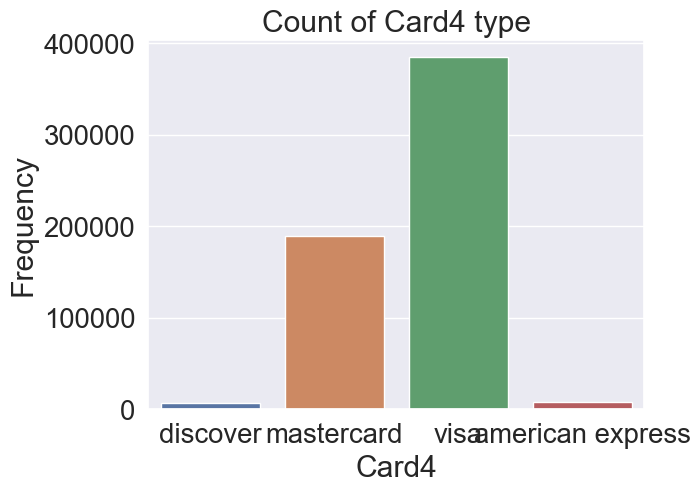

In [37]:
plt.title('Count of Card4 type')
sns.countplot(x=fraude_df.card4)
plt.xlabel('Card4')
plt.ylabel('Frequency')
plt.show()

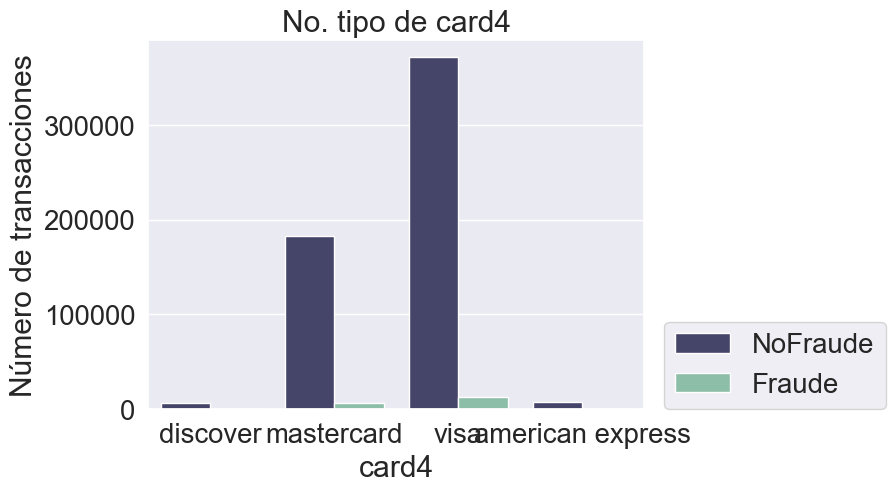

In [38]:
# ax2 = fig.add_subplot(132)
sns.countplot(x = 'card4', hue = 'isFraud', data = fraude_df, palette=["#3f3e6fd1", "#85c6a9"])
plt.title('No. tipo de card4')
plt.ylabel('Número de transacciones')
plt.legend(( 'NoFraude', 'Fraude'), loc=(1.04,0))
_ = plt.xticks(rotation=False)

En el caso de los dos tipos de transacciones, las entidades que mas procesan pagos son Mastercard y Visa. Ahora veamos el tipo de tarjeta:

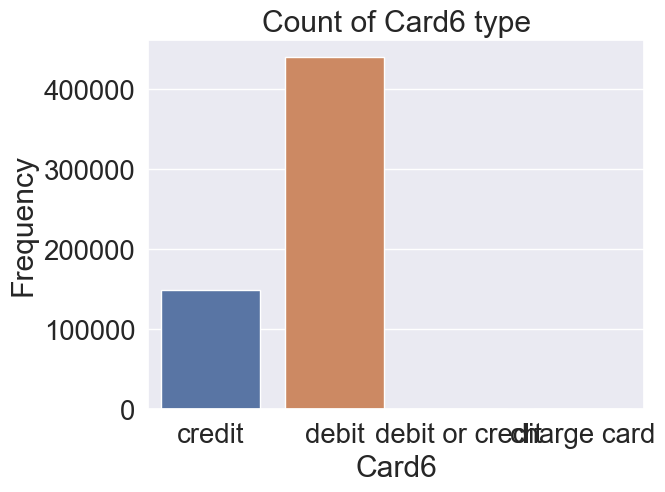

In [39]:
plt.title('Count of Card6 type')
sns.countplot(x=fraude_df.card6)
plt.xlabel('Card6')
plt.ylabel('Frequency')
plt.show()

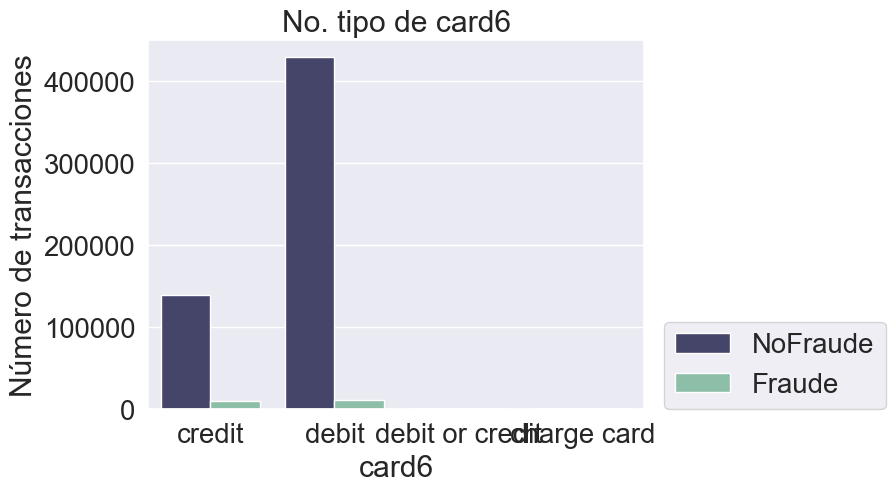

In [40]:
# ax2 = fig.add_subplot(132)
sns.countplot(x = 'card6', hue = 'isFraud', data = fraude_df, palette=["#3f3e6fd1", "#85c6a9"])
plt.title('No. tipo de card6')
plt.ylabel('Número de transacciones')
plt.legend(( 'NoFraude', 'Fraude'), loc=(1.04,0))
_ = plt.xticks(rotation=False)

In [41]:
pd.crosstab(fraude_df.card6, fraude_df.isFraud, normalize='columns')

isFraud,0,1
card6,,
charge card,0.000026,0.000000
credit,0.244633,0.482448
debit,0.755288,0.517552
debit or credit,0.000053,0.000000


Las tarjetas tipo debito son las mas usadas durante las transacciones. La mayoria de transacciones legitimas se hicieron con una tarjeta debito. Mientras que para el caso de las transacciones fraudulentas, se usaron tarjetas credito y debito casi en la misma proporción, por lo que se podria decir que no hay una predisposición a usar un tipo de tarjeta especifico para realizar el fraude.

Veamos a continuación algunas de las variables restantes de manera rápida:

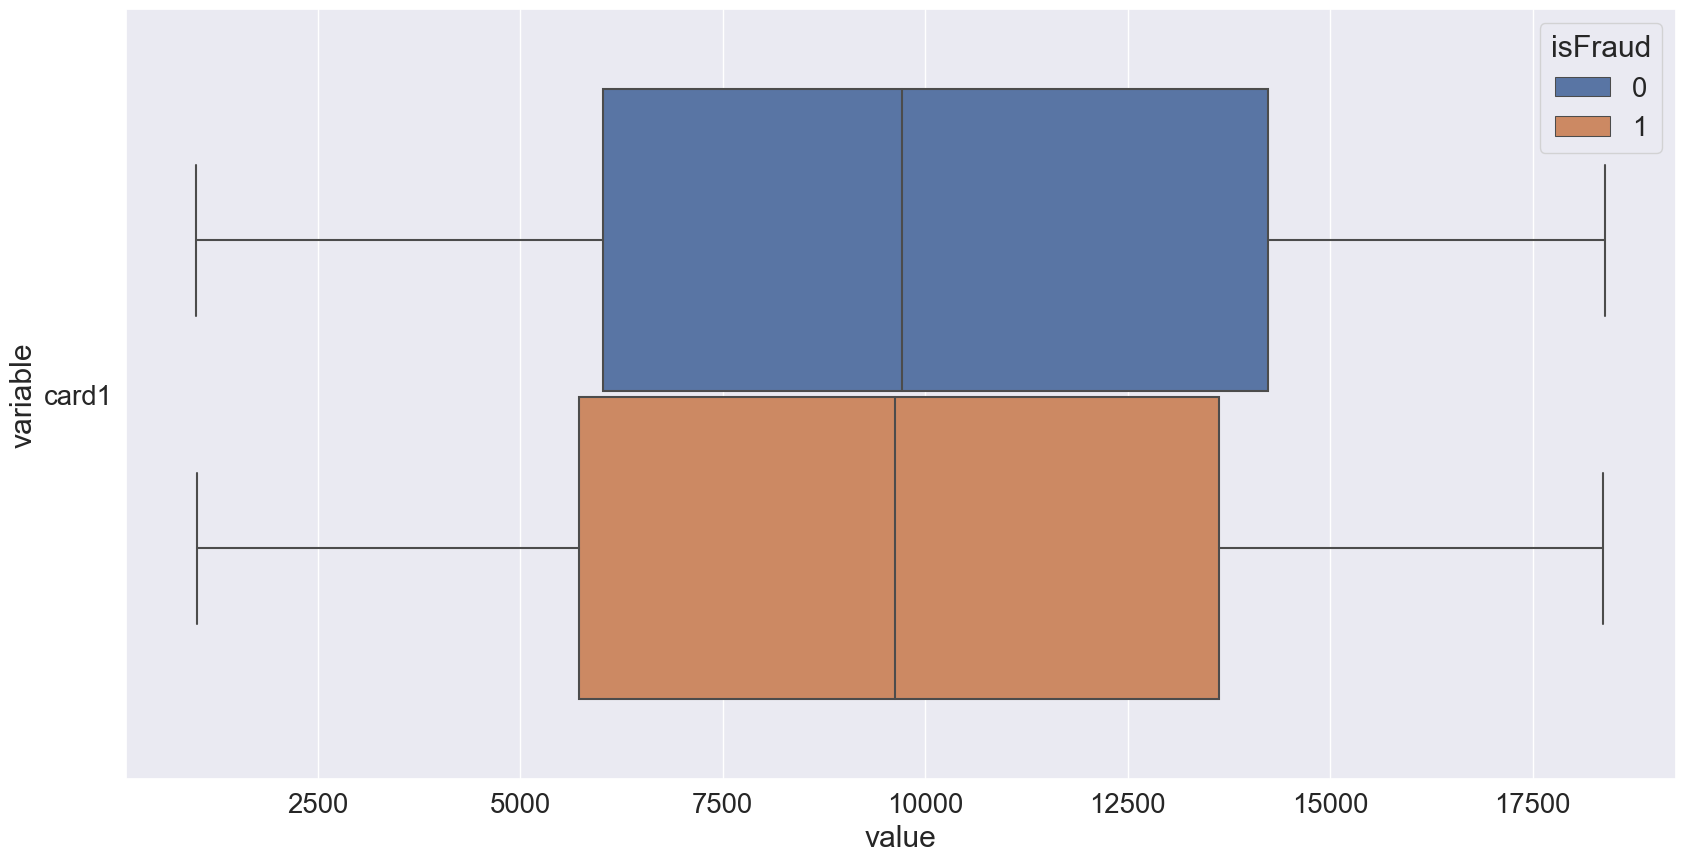

In [77]:
melted_data = pd.melt(fraude_df, id_vars = "isFraud",value_vars = 'card1')
sns.set(font_scale=1.8)
plt.figure(figsize = (20,10))
sns.boxplot(x = "value", y = "variable", hue="isFraud",data= melted_data);

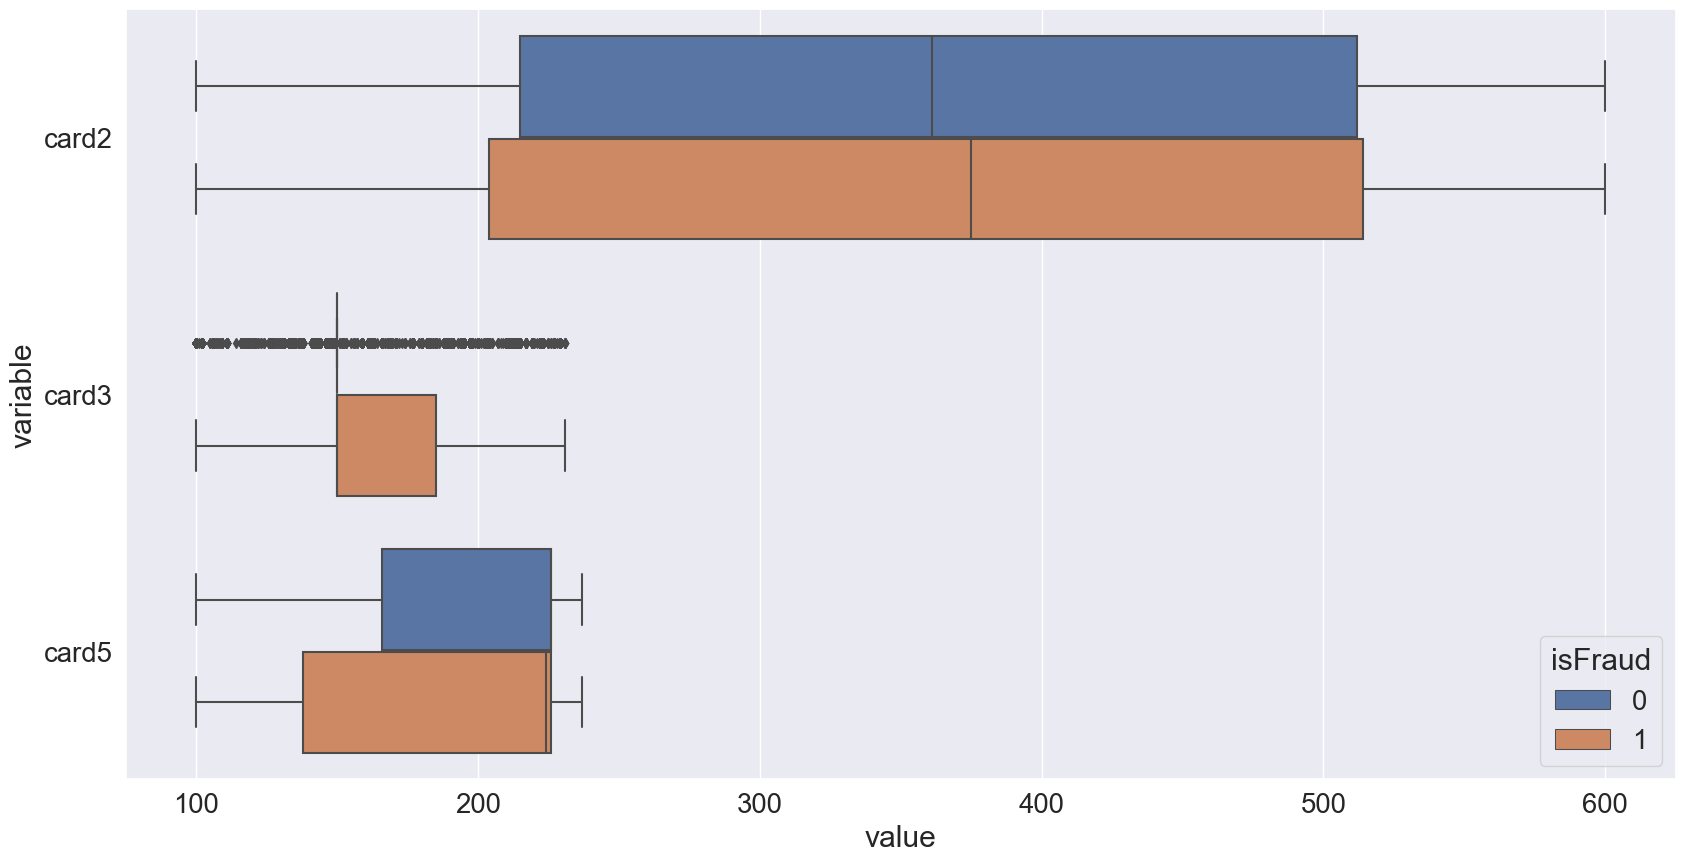

In [78]:
melted_data = pd.melt(fraude_df, id_vars = "isFraud",value_vars = fraude_df.drop(cat_cols,axis=1).filter(regex=("card.*")).drop('card1', axis=1).columns)
sns.set(font_scale=1.8)
plt.figure(figsize = (20,10))
sns.boxplot(x = "value", y = "variable", hue="isFraud",data= melted_data);

No se aprecia en los graficos de caja una diferencia significativa entre los valores que toman las variables card para cada tipo de transacción.

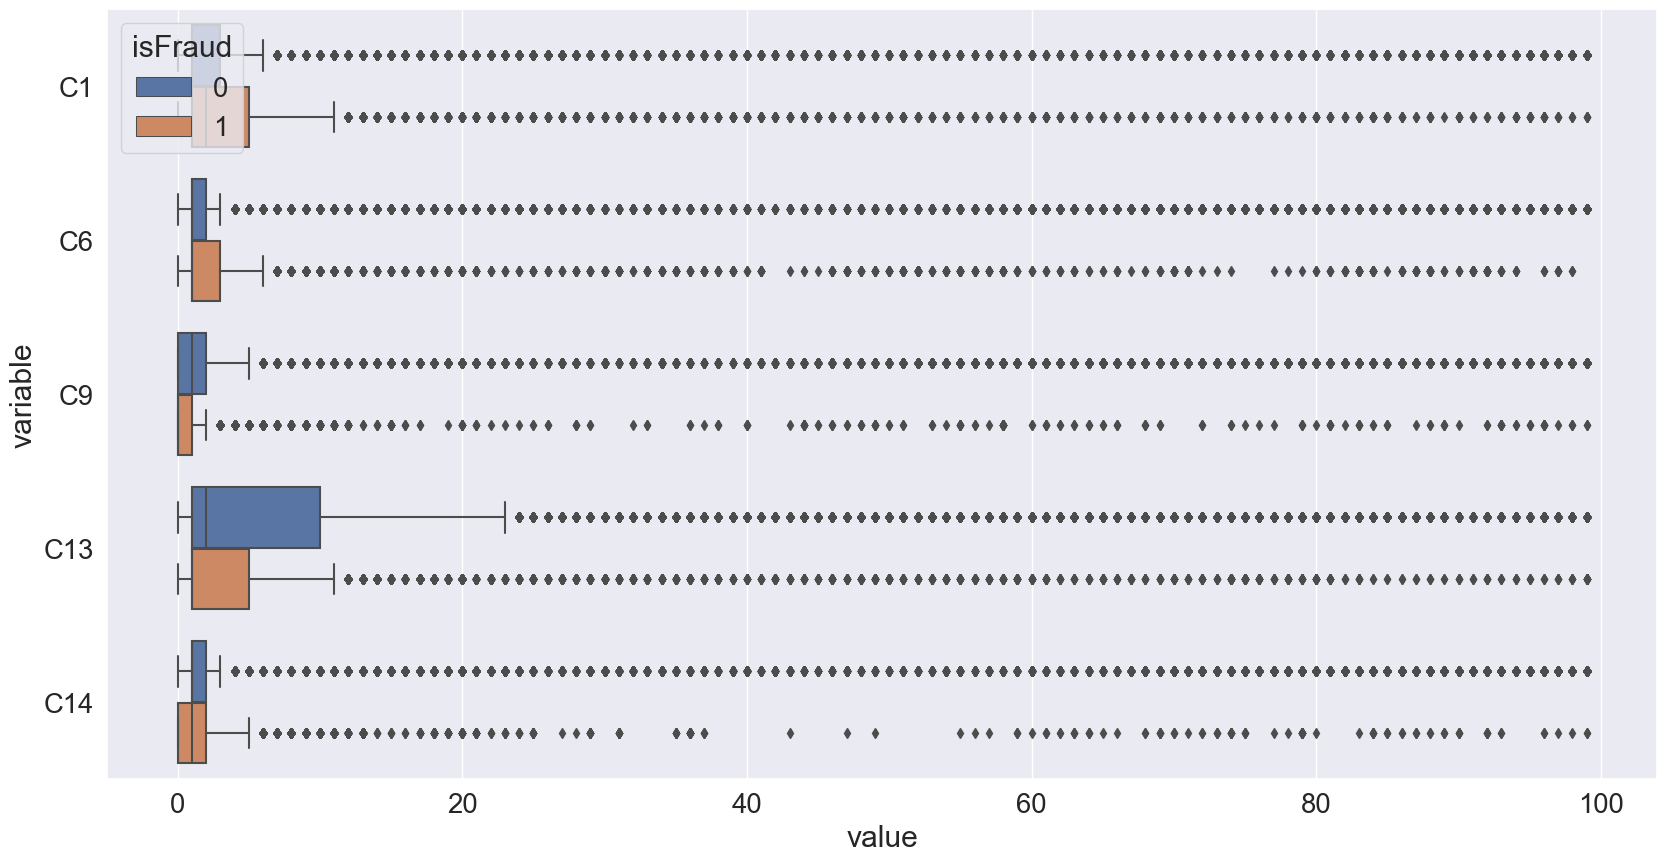

In [87]:
melted_data = pd.melt(fraude_df, id_vars = "isFraud",value_vars = ['C1', 'C6','C9' ,'C13','C14'])
sns.set(font_scale=1.8)
plt.figure(figsize = (20,10))
sns.boxplot(x = "value", y = "variable", hue="isFraud",data= melted_data[melted_data['value']<100]);

Se logran apreciar algunas diferencias entre tipo de transación para algunas variables. En el caso de C1, parece que las transaciones fraudulentas tiendan a valores mas altos en esta variable, o en la variable C13, donde las transacciones legitimas tienden a valores mas altos. Para todas las variables hay una alta presencia de valores que podrian consideranse atípicos, pero se tendria que indagar mas en el contexto en el que se tomaron los registros para confirmarlo.

### Imputación de datos

Antes de proceder al análisis de multicolinealidad, se debe asegurar que los datos no tengan ningún valor faltante, por lo que aplicaran tecnicas de imputación de datos para rellenar los datos vacios.

#### Variables númericas

Para imputar los valores faltantes de las variables númericas se usará la mediana de cada variable. 

In [110]:
from sklearn.impute import SimpleImputer
imp_fraude =  SimpleImputer(strategy='median')
# imp_fraude.fit_transform(fraude_numeric)
for col in num_cols:
    fraude_df[col] = imp_fraude.fit_transform(fraude_df[col].values.reshape(-1,1))


In [113]:
# Porcentaje de datos faltantes
per_nulos_num = (fraude_df.filter(num_cols).isnull().sum()/(len(fraude_df.filter(num_cols))))*100
pd.DataFrame(per_nulos_num ).T

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Se imputaron exitosamente los valores de las variables númericas para el conjunto de datos.

#### Variables categoricas

Para el caso de las variables categoricas con valores faltantes, se utilizará la moda mas rellenar lel vacio en los datos

In [139]:
# reemplezar faltantes con la moda
for col in cat_cols:
    most_freq = fraude_df[col].mode()[0]
    fraude_df[col].fillna(most_freq, inplace=True)

In [140]:
# Porcentaje de datos faltantes
porcentaje_nulos = (fraude_df.filter(cat_cols).isnull().sum()/(len(fraude_df.filter(cat_cols))))*100
pd.DataFrame(porcentaje_nulos).T

,ProductCD,card4,card6,P_emaildomain
0,0.0,0.0,0.0,0.0


Se imputaron exitosamente los valores de las variables categoricas para el conjunto de datos.

### Análisis de multicolinealidad

Para el análsiss de multicolinealidad se utilizará tanto el VIF (Variance Inflation Factor) y la matriz de correlación. Tambien se utilizará la prueba chi-cuadrado. Por la cantidad de variables que se manejan, se calculará el factor VIF primero entre grupos de variables, por ejemplo, las variables card, las variables D** o las variables V***.

Iniciamos con las variables que no hacen parte de un grupo de variables o cuyo grupo es muy pequeño. Estas son: **TransactionDT**, **TransactionAmt**, **addr1**, **addr2**, 

In [166]:
# lista para guardar variables que quedan 
finalistas = []

In [167]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF = pd.DataFrame()
# VIF['feature'] = fraude_df.drop(cat_cols, axis=1).filter(regex=("card.*")).columns
yes_list = ['TransactionDT','TransactionAmt','addr1', 'addr2']

while True:    
    VIF = pd.DataFrame()
    VIF['feature'] = fraude_df.filter(yes_list).columns
    VIF['VIF'] = [variance_inflation_factor(fraude_df.filter(yes_list).values, i) for i in range(fraude_df.filter(yes_list).shape[1])]

    # Encontrar la variable con el mayor VIF
    max_vif_index = VIF['VIF'].idxmax()
    max_vif_feature = VIF['feature'][max_vif_index]
    
    # Obtener el valor del VIF más grande
    max_vif = VIF.loc[max_vif_index, 'VIF']
    
    if max_vif < 5:
        break

    # Eliminar la característica con el mayor VIF
    yes_list.remove(max_vif_feature)
    display(VIF)
display(VIF) 
# finalistas.append(VIF['feature'].values) 
for i in list(VIF['feature'].values):
    finalistas.append(i)

,feature,VIF
0,TransactionDT,3.558518
1,TransactionAmt,1.339632
2,addr1,10.157082
3,addr2,13.074373


,feature,VIF
0,TransactionDT,2.867961
1,TransactionAmt,1.302766
2,addr1,3.011873


Para este caso, solo se elimina la variable **addr2** del conjunto de datos, ya que es la que tenia el mayor VIF.

* Continuamos con las variables **card**:

In [169]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF = pd.DataFrame()
# VIF['feature'] = fraude_df.drop(cat_cols, axis=1).filter(regex=("card.*")).columns
drop_list = list(cat_cols).copy()

while True:    
    VIF = pd.DataFrame()
    VIF['feature'] = fraude_df.drop(drop_list, axis=1).filter(regex=("card.*")).columns
    VIF['VIF'] = [variance_inflation_factor(fraude_df.drop(drop_list, axis=1).filter(regex=("card.*")).values, i) for i in range(fraude_df.drop(drop_list, axis=1).filter(regex=("card.*")).shape[1])]

    # Encontrar la variable con el mayor VIF
    max_vif_index = VIF['VIF'].idxmax()
    max_vif_feature = VIF['feature'][max_vif_index]
    
    # Obtener el valor del VIF más grande
    max_vif = VIF.loc[max_vif_index, 'VIF']
    
    if max_vif < 5:
        break

    # Eliminar la característica con el mayor VIF
    drop_list.append(max_vif_feature)
    display(VIF)
display(VIF)  
for i in list(VIF['feature'].values):
    finalistas.append(i)


,feature,VIF
0,card1,4.978210
1,card2,6.293692
2,card3,27.283009
3,card5,19.930369


,feature,VIF
0,card1,4.240154
1,card2,5.532705
2,card5,7.285278


,feature,VIF
0,card1,3.108169
1,card2,3.108169


Para este grupo las dos variables que permiten obtener un VIF menor a 5 son **card1** y **card2**.

* Seguimos con las variables **C##**:

In [171]:
# VARIABLES C**

drop_list = list(cat_cols).copy()

while True:    
    VIF = pd.DataFrame()
    VIF['feature'] = fraude_df.drop(drop_list, axis=1).filter(regex=("C\d+")).columns
    VIF['VIF'] = [variance_inflation_factor(fraude_df.drop(drop_list, axis=1).filter(regex=("C\d+")).values, i) for i in range(fraude_df.drop(drop_list, axis=1).filter(regex=("C\d+")).shape[1])]

    # Encontrar la variable con el mayor VIF
    max_vif_index = VIF['VIF'].idxmax()
    max_vif_feature = VIF['feature'][max_vif_index]
    
    # Obtener el valor del VIF más grande
    max_vif = VIF.loc[max_vif_index, 'VIF']
    
    if max_vif < 5:
        break

    # Eliminar la característica con el mayor VIF
    drop_list.append(max_vif_feature)
    display(VIF)
display(VIF)  
for i in list(VIF['feature'].values):
    finalistas.append(i)


,feature,VIF
0,C1,513.258502
1,C2,347.255671
2,C3,1.000764
3,C4,856.079141
4,C5,15.059040
5,C6,650.245064
6,C7,2953.148577
7,C8,1614.232379
8,C9,69.359449
9,C10,530.471117


,feature,VIF
0,C1,510.640419
1,C2,312.304149
2,C3,1.000599
3,C4,666.886306
4,C5,15.051982
5,C6,536.338087
6,C7,392.492650
7,C8,1387.978424
8,C9,65.161266
9,C10,497.780420


,feature,VIF
0,C1,489.453837
1,C2,255.864865
2,C3,1.000599
3,C4,653.241611
4,C5,14.967839
5,C6,379.357905
6,C7,391.139418
7,C8,1254.574270
8,C9,60.318934
9,C10,497.638714


,feature,VIF
0,C1,272.102834
1,C2,196.173024
2,C3,1.000319
3,C4,556.466764
4,C5,14.967815
5,C6,376.425225
6,C7,233.460118
7,C9,60.306251
8,C10,376.663769
9,C13,38.711274


,feature,VIF
0,C1,261.958273
1,C2,191.194829
2,C3,1.000309
3,C5,14.838932
4,C6,280.487946
5,C7,215.949111
6,C9,16.175863
7,C10,346.418793
8,C13,38.637376
9,C14,248.771335


,feature,VIF
0,C1,182.778859
1,C2,170.144609
2,C3,1.000293
3,C5,14.059945
4,C6,267.615313
5,C7,26.084812
6,C9,9.807435
7,C13,36.850661
8,C14,215.272253


,feature,VIF
0,C1,180.814307
1,C2,150.659330
2,C3,1.000065
3,C5,13.428922
4,C7,25.417392
5,C9,9.478291
6,C13,36.621928
7,C14,64.950008


,feature,VIF
0,C2,79.579497
1,C3,1.000064
2,C5,13.331173
3,C7,21.920843
4,C9,9.465538
5,C13,35.109144
6,C14,46.140467


,feature,VIF
0,C3,1.000053
1,C5,13.282698
2,C7,7.298450
3,C9,8.895890
4,C13,35.056744
5,C14,11.017374


,feature,VIF
0,C3,1.000007
1,C5,7.293947
2,C7,4.174555
3,C9,7.936507
4,C14,5.079280


,feature,VIF
0,C3,1.000006
1,C5,1.745438
2,C7,3.909086
3,C14,4.654531


Para el grupo de las variables que representan recuento, cuántas direcciones se encuentran asociadas a la tarjeta de pago, etc, finalmente se obtienen 4 variables: **C3**, **C4**, **C7**, **C14**.

* Ahora con las variables **D##**:

In [172]:
# VARIABLES V**

drop_list = list(cat_cols).copy()

while True:    
    VIF = pd.DataFrame()
    VIF['feature'] = fraude_df.drop(drop_list, axis=1).filter(regex=("D\d+")).columns
    VIF['VIF'] = [variance_inflation_factor(fraude_df.drop(drop_list, axis=1).filter(regex=("D\d+")).values, i) for i in range(fraude_df.drop(drop_list, axis=1).filter(regex=("D\d+")).shape[1])]

    # Encontrar la variable con el mayor VIF
    max_vif_index = VIF['VIF'].idxmax()
    max_vif_feature = VIF['feature'][max_vif_index]
    
    # Obtener el valor del VIF más grande
    max_vif = VIF.loc[max_vif_index, 'VIF']
    
    if max_vif < 5:
        break

    # Eliminar la característica con el mayor VIF
    drop_list.append(max_vif_feature)
    display(VIF)
display(VIF)  
for i in list(VIF['feature'].values):
    finalistas.append(i)


,feature,VIF
0,D1,2.371261
1,D10,2.922967
2,D15,3.488850


En este caso se conservan todas las variables de distancia.

A continuación se va a explorar la relación entre las variables categoricas, para saber si existe independencia entre ellas. Para esto se utilizará la prueba de independencia <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msup>
    <mi>&#x03C7;<!-- χ --></mi>
    <mrow class="MJX-TeXAtom-ORD">
      <mn>2</mn>
    </mrow>
  </msup>
</math>, la cual se realiza bajo las siguientes hipotesis:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msub>
    <mi>H</mi>
    <mrow class="MJX-TeXAtom-ORD">
      <mn>0</mn>
    </mrow>
  </msub>
  <mo>:</mo>
  <mtext>No hay asociación entre las variables</mtext>
</math>

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msub>
    <mi>H</mi>
    <mrow class="MJX-TeXAtom-ORD">
      <mn>1</mn>
    </mrow>
  </msub>
  <mo>:</mo>
  <mtext>Si hay asociación entre las dos variables</mtext>
</math>

Se considera un nivel de significancia de 0.05.

Primero se explora la relación de la variable **ProductCD** con las demás variables númericas

In [255]:
c_table=pd.crosstab(index=fraude_df['ProductCD'], columns=fraude_df['card4'])
c_table

card4,american express,discover,mastercard,visa
ProductCD,,,,
C,2,0,27418,41099
H,1566,603,7938,22917
R,6138,1089,7432,23040
S,622,580,4042,6384
W,0,4379,142387,292904


In [257]:
# Variables categoricas - Chi Cuadrado
import numpy as np
from scipy.stats import chi2_contingency
table = c_table
res = chi2_contingency(table)
print("p-value = {}".format(round(res.pvalue, 15)))

p-value = 0.0


Con un nivel de significancia del 0.05, se rechaza la hipotesis nula, por lo que si hay asociación entre el tipo de producto y la empresa que procesa el pago.
Ahora se compara la variable **card4** con la variable **card6**

In [258]:
c_table=pd.crosstab(index=fraude_df['card4'], columns=fraude_df['card6'])
c_table

card6,charge card,credit,debit,debit or credit
card4,,,,
american express,3,8175,150,0
discover,0,6304,347,0
mastercard,0,50772,138415,30
visa,12,83735,302597,0


In [259]:
table = c_table
res = chi2_contingency(table)
print("p-value = {}".format(round(res.pvalue, 15)))

p-value = 0.0


Con un nivel de significancia del 0.05, se rechaza la hipotesis nula, por lo que si hay asociación entre el tipo de tarjeta y la empresa que procesa el pago. 
Por ultimo se verifica la asociacón entre la variable **card6** y la variable **P_emaildomain**

In [262]:
c_table=pd.crosstab(index=fraude_df['card6'], columns=fraude_df['P_emaildomain'])
c_table

P_emaildomain,aim.com,anonymous.com,aol.com,att.net,bellsouth.net,cableone.net,centurylink.net,cfl.rr.com,charter.net,comcast.net,cox.net,earthlink.net,embarqmail.com,frontier.com,frontiernet.net,gmail,gmail.com,gmx.de,hotmail.co.uk,hotmail.com,hotmail.de,hotmail.es,hotmail.fr,icloud.com,juno.com,live.com,live.com.mx,live.fr,mac.com,mail.com,me.com,msn.com,netzero.com,netzero.net,optonline.net,outlook.com,outlook.es,prodigy.net.mx,protonmail.com,ptd.net,q.com,roadrunner.com,rocketmail.com,sbcglobal.net,sc.rr.com,servicios-ta.com,suddenlink.net,twc.com,verizon.net,web.de,windstream.net,yahoo.co.jp,yahoo.co.uk,yahoo.com,yahoo.com.mx,yahoo.de,yahoo.es,yahoo.fr,ymail.com
card6,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
charge card,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,2,0,0,0
credit,79,17297,8810,1373,826,101,66,70,329,3428,668,306,126,107,71,129,68246,115,43,15527,34,97,73,1203,93,797,231,12,280,173,627,1423,55,48,545,1425,155,117,35,26,70,106,128,1197,92,3,67,79,1279,202,86,31,26,19183,700,65,51,56,399
debit,236,19697,19479,2659,1083,58,139,102,487,4460,725,208,134,173,124,367,254535,32,69,29723,9,208,222,5064,229,2244,518,44,156,386,895,2669,175,148,466,3671,283,90,41,42,119,199,536,1773,72,32,108,151,1426,33,219,1,23,81750,843,7,83,87,1997
debit or credit,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [263]:
table = c_table
res = chi2_contingency(table)
print("p-value = {}".format(round(res.pvalue, 15)))

p-value = 0.0


Para este caso tambien se rechaza la hiótesis nula, por lo que si existe asociaón entre el dominio del correo y el tipo de tarjeta.
Estos resultados se podrian verificar con otro tipo de prueba estadistica, pero se deja para otra ocasión.


Se selecciona solo una variable entre las 4 categoricas, en este caso ProductCD.

In [270]:
finalistas.append('ProductCD')

Finalmente, se tiene el grupo de las variables **V###**:

Debido a la cantidad de variables que se tienen de este tipo, se tomaron varios subconjuntos de datos para reducir los tiempos de ejecución de los codigos.

In [197]:
# nuevo dataframe con solo las variables V###
fraude_df_V = fraude_df.drop(cat_cols, axis=1).filter(regex=("V.*"))
print(fraude_df_V.columns)

Index(['V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=151)


* Primer subconjunto (50 variables)

In [264]:
# VARIABLES V**

drop_list = []
itera = 0

while True:    
    VIF = pd.DataFrame()
    VIF['feature'] = fraude_df_V.iloc[:,0:50].drop(drop_list, axis=1).columns
    VIF['VIF'] = [variance_inflation_factor(fraude_df_V.iloc[:,0:50].drop(drop_list, axis=1).values, i) for i in range(fraude_df_V.iloc[:,0:50].drop(drop_list, axis=1).shape[1])]

    # Encontrar la variable con el mayor VIF
    max_vif_index = VIF['VIF'].idxmax()
    max_vif_feature = VIF['feature'][max_vif_index]
    
    # Obtener el valor del VIF más grande
    max_vif = VIF.loc[max_vif_index, 'VIF']
    
    if max_vif < 5:
        break

    # Eliminar la característica con el mayor VIF
    drop_list.append(max_vif_feature)
    itera+=1
    print(itera)
    display(VIF)
display(VIF)  
# for i in list(VIF['feature'].values):
#     finalistas.append(i)
 


1


,feature,VIF
0,V12,32.624911
1,V13,34.358685
2,V14,2422.434362
3,V15,354.083723
4,V16,304.250076
5,V17,157.301593
6,V18,149.565627
7,V19,47.363644
8,V20,43.098006
9,V21,46.793170


2


,feature,VIF
0,V12,32.624909
1,V13,34.358473
2,V15,354.083663
3,V16,304.245309
4,V17,157.297607
5,V18,149.565235
6,V19,47.362694
7,V20,43.097012
8,V21,46.780361
9,V22,29.213935


3


,feature,VIF
0,V12,32.490782
1,V13,34.189726
2,V16,34.603649
3,V17,157.157673
4,V18,149.415564
5,V19,47.184580
6,V20,42.960691
7,V21,46.764334
8,V22,29.200253
9,V23,77.073038


4


,feature,VIF
0,V12,32.490717
1,V13,34.189703
2,V16,34.143487
3,V17,156.777738
4,V18,149.017890
5,V19,47.133870
6,V20,42.943124
7,V21,46.751391
8,V22,29.183133
9,V23,77.063004


5


,feature,VIF
0,V12,31.625157
1,V13,33.799184
2,V16,34.053382
3,V17,156.763556
4,V18,149.009982
5,V19,43.986627
6,V20,41.374515
7,V21,46.751391
8,V22,29.174518
9,V23,75.720526


6


,feature,VIF
0,V12,31.624155
1,V13,33.799172
2,V16,34.051712
3,V18,13.261009
4,V19,43.983127
5,V20,41.371371
6,V21,38.963496
7,V22,24.361234
8,V23,75.158840
9,V24,55.493351


7


,feature,VIF
0,V12,31.537480
1,V13,33.745285
2,V16,34.041448
3,V18,13.260628
4,V19,43.982830
5,V20,41.329102
6,V21,38.944384
7,V22,24.351962
8,V23,75.122348
9,V24,55.444678


8


,feature,VIF
0,V12,31.288771
1,V13,33.539047
2,V16,30.877206
3,V18,13.070759
4,V19,43.201649
5,V20,40.760697
6,V21,34.246949
7,V22,23.471181
8,V23,74.279054
9,V24,54.723192


9


,feature,VIF
0,V12,31.119607
1,V13,33.377589
2,V16,30.827061
3,V18,12.858224
4,V19,41.912321
5,V20,39.638297
6,V21,34.246056
7,V22,23.366842
8,V24,16.965963
9,V26,50.601333


10


,feature,VIF
0,V12,31.113358
1,V13,33.362362
2,V16,25.904331
3,V18,12.858220
4,V19,41.754100
5,V20,39.550907
6,V21,33.887108
7,V22,23.364628
8,V24,16.957768
9,V26,50.534292


11


,feature,VIF
0,V12,31.097559
1,V13,33.222452
2,V16,25.823490
3,V18,12.720975
4,V19,41.214505
5,V20,39.197491
6,V21,33.334679
7,V22,23.354479
8,V24,13.986689
9,V26,43.112905


12


,feature,VIF
0,V12,31.076674
1,V13,33.102193
2,V16,25.816917
3,V18,12.679692
4,V19,41.148757
5,V20,38.699798
6,V21,33.289537
7,V22,23.310933
8,V24,12.314071
9,V27,18.961949


13


,feature,VIF
0,V12,30.964640
1,V13,32.991092
2,V16,25.632025
3,V18,12.678966
4,V19,34.225213
5,V20,35.511146
6,V21,33.270563
7,V22,23.310654
8,V24,12.311773
9,V27,18.961916


14


,feature,VIF
0,V12,30.136220
1,V13,31.829006
2,V16,25.147563
3,V18,12.678053
4,V19,9.288074
5,V21,33.174400
6,V22,23.284771
7,V24,12.142671
8,V27,18.961872
9,V28,19.039796


15


,feature,VIF
0,V12,30.111726
1,V13,31.823048
2,V16,25.004919
3,V18,12.677053
4,V19,9.288063
5,V21,28.599515
6,V22,21.736595
7,V24,12.140935
8,V27,18.961858
9,V28,19.039096


16


,feature,VIF
0,V12,30.020457
1,V13,31.747837
2,V16,25.004895
3,V18,12.677046
4,V19,9.285021
5,V21,28.599318
6,V22,21.736571
7,V24,12.140767
8,V27,18.961857
9,V28,19.039091


17


,feature,VIF
0,V12,5.936087
1,V16,24.951117
2,V18,12.671995
3,V19,9.283463
4,V21,28.598614
5,V22,21.734426
6,V24,12.079018
7,V27,18.961857
8,V28,19.039084
9,V29,20.509259


18


,feature,VIF
0,V12,5.929772
1,V16,24.665440
2,V18,12.639148
3,V19,9.264546
4,V21,28.598597
5,V22,21.656004
6,V24,11.853260
7,V27,18.961835
8,V28,19.039039
9,V29,20.503568


19


,feature,VIF
0,V12,5.929677
1,V16,23.468301
2,V18,12.623026
3,V19,9.254348
4,V21,26.938421
5,V22,21.269748
6,V24,11.807811
7,V27,18.961806
8,V28,19.038417
9,V29,20.502571


20


,feature,VIF
0,V12,5.928448
1,V16,23.464336
2,V18,12.620689
3,V19,9.182158
4,V21,26.938072
5,V22,21.269211
6,V24,11.756066
7,V27,18.961806
8,V28,19.038410
9,V29,20.433290


21


,feature,VIF
0,V12,5.900615
1,V16,23.245217
2,V18,10.718857
3,V19,9.167589
4,V22,13.272215
5,V24,11.662774
6,V27,18.961740
7,V28,19.036695
8,V29,20.432960
9,V30,21.622182


22


,feature,VIF
0,V12,5.900200
1,V18,10.713315
2,V19,9.068422
3,V22,13.139989
4,V24,11.659204
5,V27,18.945395
6,V28,19.032511
7,V29,20.432932
8,V30,21.622159
9,V32,12.827042


23


,feature,VIF
0,V12,5.899883
1,V18,10.711845
2,V19,9.066771
3,V22,13.139602
4,V24,11.610362
5,V27,18.945393
6,V28,19.032508
7,V29,7.431506
8,V32,12.826147
9,V34,8.839583


24


,feature,VIF
0,V12,5.899292
1,V18,10.705684
2,V19,9.047844
3,V22,13.132897
4,V24,11.607414
5,V27,18.945275
6,V28,19.032244
7,V29,7.431436
8,V32,12.802795
9,V34,8.785794


25


,feature,VIF
0,V12,5.654298
1,V18,10.704284
2,V19,9.025135
3,V22,13.132842
4,V24,11.606894
5,V27,18.945264
6,V28,19.032237
7,V29,7.427856
8,V32,12.799806
9,V34,8.770946


26


,feature,VIF
0,V12,5.604529
1,V18,10.636714
2,V19,8.960849
3,V22,13.093645
4,V24,8.910129
5,V27,18.945253
6,V28,19.032158
7,V29,7.426154
8,V32,12.771349
9,V34,8.614389


27


,feature,VIF
0,V12,5.602752
1,V18,10.576007
2,V19,8.895650
3,V22,13.081596
4,V24,8.862929
5,V27,18.944298
6,V28,19.031262
7,V29,7.420581
8,V32,12.573571
9,V34,8.610930


28


,feature,VIF
0,V12,5.602715
1,V18,10.575460
2,V19,8.895512
3,V22,13.076792
4,V24,8.862928
5,V27,1.520995
6,V29,7.420580
7,V32,12.563275
8,V34,8.610544
9,V53,5.310542


29


,feature,VIF
0,V12,5.602287
1,V18,10.480266
2,V19,8.875238
3,V22,12.828783
4,V24,8.862740
5,V27,1.520718
6,V29,7.419711
7,V32,12.092300
8,V34,8.566085
9,V53,5.309785


30


,feature,VIF
0,V12,5.601342
1,V18,10.460468
2,V19,8.750518
3,V22,12.736123
4,V24,8.229019
5,V27,1.520717
6,V29,7.417198
7,V32,12.087654
8,V34,8.543434
9,V53,5.283519


31


,feature,VIF
0,V12,5.594805
1,V18,6.518708
2,V19,8.750412
3,V24,8.222366
4,V27,1.519140
5,V29,7.416674
6,V32,10.504149
7,V34,8.543261
8,V53,5.271078
9,V56,7.265925


32


,feature,VIF
0,V12,5.558072
1,V18,6.278617
2,V19,8.748397
3,V24,8.106961
4,V27,1.518370
5,V29,7.416457
6,V32,8.061685
7,V34,8.158345
8,V53,5.180041
9,V56,7.137606


33


,feature,VIF
0,V12,5.431953
1,V18,6.259203
2,V24,7.528969
3,V27,1.515375
4,V29,7.327459
5,V32,8.021078
6,V34,8.104885
7,V53,5.180009
8,V56,7.073012
9,V60,7.061861


34


,feature,VIF
0,V12,5.429550
1,V18,6.245745
2,V24,7.443134
3,V27,1.511786
4,V29,7.325550
5,V32,6.918506
6,V53,5.179248
7,V56,7.005693
8,V60,7.016302
9,V62,4.958556


35


,feature,VIF
0,V12,5.308601
1,V18,6.064005
2,V27,1.511430
3,V29,7.238144
4,V32,6.802998
5,V53,5.170847
6,V56,6.753608
7,V60,6.992366
8,V62,4.375224
9,V64,7.143994


36


,feature,VIF
0,V12,5.285614
1,V18,6.063777
2,V27,1.511425
3,V32,6.802766
4,V53,5.169756
5,V56,6.746693
6,V60,6.992161
7,V62,4.375182
8,V64,7.143202
9,V68,1.505242


37


,feature,VIF
0,V12,5.279381
1,V18,5.936074
2,V27,1.510910
3,V32,6.788074
4,V53,5.139390
5,V56,6.680501
6,V60,4.261869
7,V62,4.364248
8,V68,1.503810
9,V70,1.414419


38


,feature,VIF
0,V12,5.257501
1,V18,3.518870
2,V27,1.510028
3,V53,5.131231
4,V56,6.677291
5,V60,4.218624
6,V62,4.346911
7,V68,1.503505
8,V70,1.414419
9,V74,4.235681


39


,feature,VIF
0,V12,5.257454
1,V18,3.477300
2,V27,1.509807
3,V53,5.110950
4,V60,3.999412
5,V62,3.898256
6,V68,1.503495
7,V70,1.397366
8,V74,4.198889
9,V76,4.925896


40


,feature,VIF
0,V18,3.391679
1,V27,1.509250
2,V53,4.278447
3,V60,3.978048
4,V62,3.834879
5,V68,1.502668
6,V70,1.396655
7,V74,4.198889
8,V76,3.964007
9,V78,3.682599


,feature,VIF
0,V18,3.112834
1,V27,1.507485
2,V53,4.257625
3,V60,3.938985
4,V62,3.834838
5,V68,1.502340
6,V70,1.388648
7,V74,3.009668
8,V76,3.834810
9,V78,3.179912


In [268]:
for i in list(VIF['feature'].values):
    finalistas.append(i)

Se añaden las variables cuyo VIF es menor a 5 a la lista de variables finalistas.

* Segundo subconjunto (50 variables)

In [272]:
drop_list = []
itera = 0

while True:    
    VIF = pd.DataFrame()
    VIF['feature'] = fraude_df_V.iloc[:,50:101].drop(drop_list, axis=1).columns
    VIF['VIF'] = [variance_inflation_factor(fraude_df_V.iloc[:,50:101].drop(drop_list, axis=1).values, i) for i in range(fraude_df_V.iloc[:,50:101].drop(drop_list, axis=1).shape[1])]

    # Encontrar la variable con el mayor VIF
    max_vif_index = VIF['VIF'].idxmax()
    max_vif_feature = VIF['feature'][max_vif_index]
    
    # Obtener el valor del VIF más grande
    max_vif = VIF.loc[max_vif_index, 'VIF']
    
    if max_vif < 5:
        break

    # Eliminar la característica con el mayor VIF
    drop_list.append(max_vif_feature)
    itera+=1
    print(itera)
    display(VIF)
display(VIF)  
for i in list(VIF['feature'].values):
    finalistas.append(i)

1


,feature,VIF
0,V80,2.486114e+01
1,V81,2.172922e+01
2,V82,3.340363e+01
3,V83,3.124129e+01
4,V84,2.733180e+01
5,V85,2.190879e+01
6,V86,3.342494e+01
7,V87,2.499932e+01
8,V88,1.071563e+03
9,V89,1.056395e+00


2


,feature,VIF
0,V80,2.486070e+01
1,V81,2.172874e+01
2,V82,3.340359e+01
3,V83,3.124116e+01
4,V84,2.733165e+01
5,V85,2.190865e+01
6,V86,3.342491e+01
7,V87,2.499923e+01
8,V88,1.071563e+03
9,V89,1.056378e+00


3


,feature,VIF
0,V80,24.860498
1,V81,21.728443
2,V82,33.402956
3,V83,31.240892
4,V84,27.331488
5,V85,21.908579
6,V86,33.424881
7,V87,24.998986
8,V88,1071.527542
9,V89,1.054797


4


,feature,VIF
0,V80,24.860476
1,V81,21.728258
2,V82,33.402378
3,V83,31.240633
4,V84,27.331392
5,V85,21.908521
6,V86,33.424488
7,V87,24.998932
8,V88,1071.525327
9,V89,1.054671


5


,feature,VIF
0,V80,24.860465
1,V81,21.728242
2,V82,33.402376
3,V83,31.240630
4,V84,27.331312
5,V85,21.908381
6,V86,33.424128
7,V87,24.998509
8,V88,1069.942387
9,V89,1.054670


6


,feature,VIF
0,V80,24.859262
1,V81,21.727367
2,V82,33.402272
3,V83,31.240575
4,V84,27.331134
5,V85,21.908327
6,V86,33.419290
7,V87,24.995906
8,V88,1044.246901
9,V89,1.054669


7


,feature,VIF
0,V80,24.858843
1,V81,21.727205
2,V82,33.400955
3,V83,31.239450
4,V84,27.330749
5,V85,21.908256
6,V86,33.419204
7,V87,24.995010
8,V88,1038.704462
9,V89,1.054668


8


,feature,VIF
0,V80,24.858839
1,V81,21.727157
2,V82,33.400800
3,V83,31.239177
4,V84,27.330537
5,V85,21.908076
6,V86,33.416849
7,V87,24.993735
8,V88,1037.573887
9,V89,1.054668


9


,feature,VIF
0,V80,24.857952
1,V81,21.726639
2,V82,33.400474
3,V83,31.238909
4,V84,27.329576
5,V85,21.907942
6,V86,33.413299
7,V87,24.992667
8,V88,575.427398
9,V89,1.054668


10


,feature,VIF
0,V80,24.855110
1,V81,21.722612
2,V82,33.400473
3,V83,31.238903
4,V84,27.328287
5,V85,21.906490
6,V86,33.411944
7,V87,24.992662
8,V88,573.057822
9,V89,1.054668


11


,feature,VIF
0,V80,24.854691
1,V81,21.721592
2,V82,33.399864
3,V83,31.238377
4,V84,27.327976
5,V85,21.906292
6,V86,33.411942
7,V87,24.988428
8,V88,513.594250
9,V89,1.054668


12


,feature,VIF
0,V80,24.853726
1,V81,21.720477
2,V82,33.398406
3,V83,31.236491
4,V84,27.327657
5,V85,21.905494
6,V86,33.405979
7,V87,24.987946
8,V88,501.666755
9,V89,1.054666


13


,feature,VIF
0,V80,24.851378
1,V81,21.719615
2,V82,33.398321
3,V83,31.236445
4,V84,27.326940
5,V85,21.904841
6,V86,33.405469
7,V87,24.987928
8,V88,318.482095
9,V89,1.054665


14


,feature,VIF
0,V80,24.851356
1,V81,21.719571
2,V82,33.381499
3,V83,31.210277
4,V84,27.326921
5,V85,21.904841
6,V86,33.405452
7,V87,24.987909
8,V88,318.465689
9,V89,1.054507


15


,feature,VIF
0,V80,24.849161
1,V81,21.718158
2,V82,33.380824
3,V83,31.209049
4,V84,27.326768
5,V85,21.904826
6,V86,33.402456
7,V87,24.986858
8,V88,311.125666
9,V89,1.054507


16


,feature,VIF
0,V80,24.848699
1,V81,21.716485
2,V82,33.380822
3,V83,31.208980
4,V84,27.326233
5,V85,21.903790
6,V86,33.341529
7,V87,24.958761
8,V88,303.640722
9,V89,1.054473


17


,feature,VIF
0,V80,24.834160
1,V81,21.716351
2,V82,33.322119
3,V83,31.204014
4,V84,27.312348
5,V85,21.903734
6,V86,33.187434
7,V87,24.952050
8,V89,1.054319
9,V90,20.795470


18


,feature,VIF
0,V80,24.833146
1,V81,21.715142
2,V82,33.271734
3,V83,31.144879
4,V84,27.311864
5,V85,21.901625
6,V86,33.183720
7,V87,24.951056
8,V89,1.050828
9,V90,20.795451


19


,feature,VIF
0,V80,24.832581
1,V81,21.714919
2,V82,33.268634
3,V83,31.144759
4,V84,27.311621
5,V85,21.901548
6,V86,33.169864
7,V87,24.947177
8,V89,1.050828
9,V90,20.795377


20


,feature,VIF
0,V80,24.832514
1,V81,21.713711
2,V82,33.260245
3,V83,31.141987
4,V84,27.311187
5,V85,21.901518
6,V86,33.137131
7,V87,24.946824
8,V89,1.050770
9,V90,20.790120


21


,feature,VIF
0,V80,24.832502
1,V81,21.713565
2,V82,33.255990
3,V83,31.135400
4,V84,27.310646
5,V85,21.901309
6,V86,33.117259
7,V87,24.946781
8,V89,1.050742
9,V90,20.790019


22


,feature,VIF
0,V80,24.832398
1,V81,21.713511
2,V82,33.255873
3,V83,31.135398
4,V84,27.310591
5,V85,21.901010
6,V86,33.088663
7,V87,24.901908
8,V89,1.050742
9,V90,20.789931


23


,feature,VIF
0,V80,24.832398
1,V81,21.713486
2,V82,33.255502
3,V83,31.134578
4,V84,27.310565
5,V85,21.900989
6,V86,33.088640
7,V87,24.901843
8,V89,1.049184
9,V90,20.789920


24


,feature,VIF
0,V80,24.789903
1,V81,21.710563
2,V82,32.974812
3,V83,31.115045
4,V84,27.281649
5,V85,21.896967
6,V86,32.477313
7,V87,24.846555
8,V89,1.048289
9,V90,20.754890


25


,feature,VIF
0,V80,24.789867
1,V81,21.710527
2,V82,32.971742
3,V83,31.114876
4,V84,27.281315
5,V85,21.896954
6,V86,32.476234
7,V87,24.846483
8,V89,1.047043
9,V90,20.754703


26


,feature,VIF
0,V80,24.646737
1,V81,21.641167
2,V82,29.686309
3,V83,27.600113
4,V84,21.854487
5,V85,18.366533
6,V86,32.446961
7,V87,24.781485
8,V89,1.046707
9,V90,20.717290


27


,feature,VIF
0,V80,24.645287
1,V81,21.636325
2,V82,29.532990
3,V83,27.600028
4,V84,21.854378
5,V85,18.364089
6,V86,30.907634
7,V87,24.730650
8,V89,1.046454
9,V90,20.707461


28


,feature,VIF
0,V80,24.279205
1,V81,21.407552
2,V82,28.951265
3,V83,27.330460
4,V84,21.839185
5,V85,18.278947
6,V87,6.686934
7,V89,1.046446
8,V90,20.634133
9,V91,20.090436


29


,feature,VIF
0,V80,24.279199
1,V81,21.407551
2,V82,28.948090
3,V83,27.329972
4,V84,21.839086
5,V85,18.278946
6,V87,6.686834
7,V89,1.046325
8,V90,20.633251
9,V91,20.090399


30


,feature,VIF
0,V80,24.261765
1,V81,21.397751
2,V83,5.087725
3,V84,21.314128
4,V85,17.905682
5,V87,6.686340
6,V89,1.046224
7,V90,20.406861
8,V91,19.845892
9,V93,6.912677


31


,feature,VIF
0,V81,5.248523
1,V83,5.085629
2,V84,12.086056
3,V85,12.543555
4,V87,6.684216
5,V89,1.046176
6,V90,20.406806
7,V91,19.845886
8,V93,6.909172
9,V94,4.484102


32


,feature,VIF
0,V81,5.225611
1,V83,4.434353
2,V84,12.037800
3,V85,12.543043
4,V87,6.299599
5,V89,1.045626
6,V90,20.278020
7,V91,19.825627
8,V93,6.888657
9,V94,4.474404


33


,feature,VIF
0,V81,5.225318
1,V83,4.434244
2,V84,12.037608
3,V85,12.542075
4,V87,6.299599
5,V89,1.045341
6,V90,20.278014
7,V91,19.825622
8,V93,6.888548
9,V94,4.473664


34


,feature,VIF
0,V81,5.225062
1,V83,4.433202
2,V84,12.036881
3,V85,12.541615
4,V87,6.298224
5,V89,1.045336
6,V91,1.494204
7,V93,6.888314
8,V94,4.472154
9,V98,1.777813


35


,feature,VIF
0,V81,4.681764
1,V83,4.425091
2,V84,6.888640
3,V87,6.295990
4,V89,1.044662
5,V91,1.494093
6,V93,6.088431
7,V94,4.293313
8,V98,1.777719
9,V99,4.963013


36


,feature,VIF
0,V81,4.670075
1,V83,3.678202
2,V84,6.838266
3,V87,4.052185
4,V89,1.043903
5,V91,1.447104
6,V93,6.023096
7,V94,4.285633
8,V98,1.777107
9,V99,4.926986


37


,feature,VIF
0,V81,3.363122
1,V83,3.675631
2,V87,4.051593
3,V89,1.037489
4,V91,1.447075
5,V93,5.363782
6,V94,3.893099
7,V98,1.776838
8,V99,4.923209
9,V100,4.880913


38


,feature,VIF
0,V81,3.363122
1,V83,3.674779
2,V87,4.045095
3,V89,1.037347
4,V91,1.447052
5,V93,5.363757
6,V94,3.892008
7,V98,1.775992
8,V99,4.900564
9,V100,4.842067


,feature,VIF
0,V81,2.412642
1,V83,3.638184
2,V87,4.043474
3,V89,1.033286
4,V91,1.441979
5,V94,2.479991
6,V98,1.775810
7,V99,4.891019
8,V100,4.841668
9,V104,1.967888


* Tercer subconjunto (20 variables)

In [275]:
drop_list = []
itera = 0

while True:    
    VIF = pd.DataFrame()
    VIF['feature'] = fraude_df_V.iloc[:,101:121].drop(drop_list, axis=1).columns
    VIF['VIF'] = [variance_inflation_factor(fraude_df_V.iloc[:,101:121].drop(drop_list, axis=1).values, i) for i in range(fraude_df_V.iloc[:,101:121].drop(drop_list, axis=1).shape[1])]

    # Encontrar la variable con el mayor VIF
    max_vif_index = VIF['VIF'].idxmax()
    max_vif_feature = VIF['feature'][max_vif_index]
    
    # Obtener el valor del VIF más grande
    max_vif = VIF.loc[max_vif_index, 'VIF']
    
    if max_vif < 5:
        break

    # Eliminar la característica con el mayor VIF
    drop_list.append(max_vif_feature)
    itera+=1
    print(itera)
    display(VIF)
display(VIF)  
for i in list(VIF['feature'].values):
    finalistas.append(i)

1


,feature,VIF
0,V131,1.401232
1,V132,308.472705
2,V133,75.888047
3,V134,372.885933
4,V135,16.865481
5,V136,27.753998
6,V137,42.105957
7,V279,300.541408
8,V280,287.955704
9,V281,1.930789


2


,feature,VIF
0,V131,1.378667
1,V132,139.502863
2,V133,55.108650
3,V135,16.784271
4,V136,27.441020
5,V137,42.097733
6,V279,136.968364
7,V280,54.904093
8,V281,1.930135
9,V282,4.951029


3


,feature,VIF
0,V131,1.374132
1,V133,40.033169
2,V135,16.757317
3,V136,27.227115
4,V137,41.653921
5,V279,11.295932
6,V280,43.491180
7,V281,1.927895
8,V282,4.926727
9,V283,4.055544


4


,feature,VIF
0,V131,1.353104
1,V133,17.978295
2,V135,12.637088
3,V136,27.206984
4,V137,36.273747
5,V279,10.550746
6,V281,1.927781
7,V282,4.917038
8,V283,4.046582
9,V284,2.548576


5


,feature,VIF
0,V131,1.353102
1,V133,17.654882
2,V135,6.112098
3,V136,11.548390
4,V279,10.517953
5,V281,1.927384
6,V282,4.917019
7,V283,4.046310
8,V284,2.548470
9,V285,3.913498


6


,feature,VIF
0,V131,1.351865
1,V135,3.980110
2,V136,6.502776
3,V279,2.682562
4,V281,1.927383
5,V282,4.915249
6,V283,4.045734
7,V284,2.542021
8,V285,3.901643
9,V286,1.606893


7


,feature,VIF
0,V131,1.351728
1,V135,3.978654
2,V136,6.497806
3,V279,2.680525
4,V281,1.906873
5,V282,4.604466
6,V283,3.132570
7,V284,2.542017
8,V285,3.896658
9,V286,1.606054


8


,feature,VIF
0,V131,1.324555
1,V135,1.043788
2,V279,1.181825
3,V281,1.903172
4,V282,4.600788
5,V283,3.130874
6,V284,2.539663
7,V285,3.887179
8,V286,1.602375
9,V287,5.253678


,feature,VIF
0,V131,1.249659
1,V135,1.043722
2,V279,1.151662
3,V281,1.902006
4,V282,4.581408
5,V283,3.070211
6,V284,2.151012
7,V285,1.601140
8,V286,1.593605
9,V288,1.772312


* Cuarto Subconjunto (20 variables)

In [276]:
drop_list = []
itera = 0

while True:    
    VIF = pd.DataFrame()
    VIF['feature'] = fraude_df_V.iloc[:,121:141].drop(drop_list, axis=1).columns
    VIF['VIF'] = [variance_inflation_factor(fraude_df_V.iloc[:,121:141].drop(drop_list, axis=1).values, i) for i in range(fraude_df_V.iloc[:,121:141].drop(drop_list, axis=1).shape[1])]

    # Encontrar la variable con el mayor VIF
    max_vif_index = VIF['VIF'].idxmax()
    max_vif_feature = VIF['feature'][max_vif_index]
    
    # Obtener el valor del VIF más grande
    max_vif = VIF.loc[max_vif_index, 'VIF']
    
    if max_vif < 5:
        break

    # Eliminar la característica con el mayor VIF
    drop_list.append(max_vif_feature)
    itera+=1
    print(itera)
    display(VIF)
display(VIF)  
for i in list(VIF['feature'].values):
    finalistas.append(i)

1


,feature,VIF
0,V292,5.955065
1,V293,122.163018
2,V294,150.107890
3,V295,254.807231
4,V296,61.185929
5,V297,8.371680
6,V298,103.232498
7,V299,27.492580
8,V300,7.718169
9,V301,7.508707


2


,feature,VIF
0,V292,5.951014
1,V293,63.126159
2,V294,103.835181
3,V295,57.905551
4,V296,61.096435
5,V297,8.252045
6,V298,102.854381
7,V299,25.937467
8,V300,7.714666
9,V301,7.495940


3


,feature,VIF
0,V292,5.490872
1,V293,37.888839
2,V294,45.852780
3,V295,55.407585
4,V296,61.012373
5,V297,8.218177
6,V298,101.852742
7,V299,25.578389
8,V300,7.714531
9,V301,7.491377


4


,feature,VIF
0,V292,5.207249
1,V293,37.505790
2,V294,45.597191
3,V295,53.797215
4,V296,11.953575
5,V297,8.216496
6,V299,21.713064
7,V300,7.714104
8,V301,7.490581
9,V302,22.119873


5


,feature,VIF
0,V292,3.855691
1,V293,35.579592
2,V294,17.980544
3,V296,11.949005
4,V297,7.910577
5,V299,18.166074
6,V300,7.712367
7,V301,7.481586
8,V302,21.972995
9,V303,13.589701


6


,feature,VIF
0,V292,3.834331
1,V293,35.463184
2,V294,17.979099
3,V296,11.938721
4,V297,7.854212
5,V299,17.934866
6,V300,7.712307
7,V301,7.481340
8,V302,7.434018
9,V303,8.085697


7


,feature,VIF
0,V292,3.505273
1,V294,15.144346
2,V296,11.862191
3,V297,7.851222
4,V299,17.931142
5,V300,7.680274
6,V301,7.480462
7,V302,7.428532
8,V303,8.084375
9,V305,1.736177


8


,feature,VIF
0,V292,3.283861
1,V294,14.697946
2,V296,7.268470
3,V297,3.975395
4,V300,7.618983
5,V301,7.480201
6,V302,7.405410
7,V303,8.026525
8,V305,1.731837
9,V306,7.777062


9


,feature,VIF
0,V292,1.398731
1,V296,4.687156
2,V297,3.834590
3,V300,7.618288
4,V301,7.457165
5,V302,7.346329
6,V303,7.967152
7,V305,1.588506
8,V306,2.740060
9,V309,5.009255


10


,feature,VIF
0,V292,1.140120
1,V296,4.503014
2,V297,3.834534
3,V300,7.616514
4,V301,7.457003
5,V302,1.348003
6,V305,1.561036
7,V306,2.735090
8,V309,5.008717
9,V310,1.518363


11


,feature,VIF
0,V292,1.139869
1,V296,4.447638
2,V297,3.737205
3,V301,1.332805
4,V302,1.346079
5,V305,1.560994
6,V306,2.734989
7,V309,5.008663
8,V310,1.517382
9,V311,4.617641


,feature,VIF
0,V292,1.139640
1,V296,4.445065
2,V297,3.733521
3,V301,1.332666
4,V302,1.346070
5,V305,1.560787
6,V306,2.734860
7,V310,1.399531
8,V311,1.131621


* Quinto subconjunto (11 variables)

In [277]:
drop_list = []
itera = 0

while True:    
    VIF = pd.DataFrame()
    VIF['feature'] = fraude_df_V.iloc[:,141:].drop(drop_list, axis=1).columns
    VIF['VIF'] = [variance_inflation_factor(fraude_df_V.iloc[:,141:].drop(drop_list, axis=1).values, i) for i in range(fraude_df_V.iloc[:,141:].drop(drop_list, axis=1).shape[1])]

    # Encontrar la variable con el mayor VIF
    max_vif_index = VIF['VIF'].idxmax()
    max_vif_feature = VIF['feature'][max_vif_index]
    
    # Obtener el valor del VIF más grande
    max_vif = VIF.loc[max_vif_index, 'VIF']
    
    if max_vif < 5:
        break

    # Eliminar la característica con el mayor VIF
    drop_list.append(max_vif_feature)
    itera+=1
    print(itera)
    display(VIF)
display(VIF)  
for i in list(VIF['feature'].values):
    finalistas.append(i)

1


,feature,VIF
0,V312,1.355337
1,V313,6.796558
2,V314,4.009142
3,V315,10.519763
4,V316,9.023740
5,V317,17.821340
6,V318,31.330895
7,V319,13.070229
8,V320,19.537975
9,V321,32.181180


2


,feature,VIF
0,V312,1.353450
1,V313,6.796138
2,V314,4.008793
3,V315,10.519666
4,V316,9.002875
5,V317,17.126487
6,V318,30.541516
7,V319,5.732487
8,V320,9.320860


3


,feature,VIF
0,V312,1.352938
1,V313,6.793978
2,V314,4.001189
3,V315,10.504276
4,V316,5.877196
5,V317,7.688216
6,V319,4.940941
7,V320,7.587547


4


,feature,VIF
0,V312,1.342120
1,V313,2.484751
2,V314,2.649602
3,V316,5.873203
4,V317,7.685233
5,V319,4.932771
6,V320,7.566478


5


,feature,VIF
0,V312,1.341309
1,V313,2.479578
2,V314,2.644337
3,V316,2.176067
4,V319,4.104652
5,V320,5.900988


,feature,VIF
0,V312,1.314007
1,V313,2.457131
2,V314,2.610204
3,V316,1.093072
4,V319,1.022390


In [278]:
len(finalistas)


62

Finalmente, se tienen 62 variables de las 180 que se tenian originalmente (quitando la variable dependiente). Todavia se puede reducir aún más la multicolinealidad, al evaluar las 62 variables finalista, pero por motivos de tiempo no sé continua con el proceso de eliminar multicolinealidad. 